In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/leo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 6 train.csv 用电数据

In [3]:
data = pd.read_csv('6 train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047614 entries, 0 to 1047613
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Time        1047614 non-null  object 
 1   BuildingID  1047614 non-null  int64  
 2   Type        1047614 non-null  object 
 3   Record      1047614 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [5]:
data.describe()

,BuildingID,Record
count,1.047614e+06,1.047614e+06
mean,9.471794e+00,2.126112e+02
std,5.762828e+00,2.261805e+03
min,0.000000e+00,-4.378370e+05
25%,4.000000e+00,2.625000e+01
50%,9.000000e+00,1.036300e+02
75%,1.400000e+01,2.310000e+02
max,1.900000e+01,1.966968e+06


In [6]:
data.loc[(data['BuildingID'] == 0) & (data['Type'] == 'W')]

,Time,BuildingID,Type,Record
1,2015-01-01 00:00:00,0,W,203.15
3,2015-01-01 01:00:00,0,W,205.14
5,2015-01-01 02:00:00,0,W,179.15
7,2015-01-01 03:00:00,0,W,173.16
9,2015-01-01 04:00:00,0,W,194.17
...,...,...,...,...
52599,2017-12-31 19:00:00,0,W,217.72
52601,2017-12-31 20:00:00,0,W,227.37
52603,2017-12-31 21:00:00,0,W,236.06
52605,2017-12-31 22:00:00,0,W,226.09


In [17]:
time = np.array(data.loc[(data['BuildingID'] == 0) & (data['Type'] == 'W')]['Time'])
record = np.array(data.loc[(data['BuildingID'] == 0) & (data['Type'] == 'W')]['Record'])

0号building，2015年前1000条空调用能数据

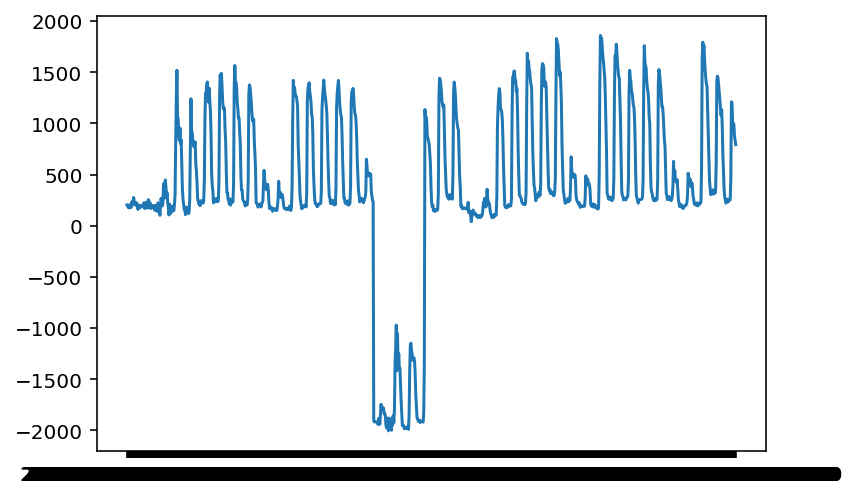

In [19]:
plt.plot(time[:1000], record[:1000])

(array([2.71838326e-04, 3.62451101e-04, 1.29446822e-04, 3.88340466e-05,
        1.29446822e-05, 1.29446822e-05, 0.00000000e+00, 7.76680932e-05,
        5.17787288e-05, 5.17787288e-05, 3.88340466e-05, 1.29446822e-05,
        1.29446822e-05, 1.29446822e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.17787288e-05, 7.63736250e-04,
        3.24911523e-03, 2.10998320e-03, 7.89625614e-04, 5.30731970e-04,
        4.14229830e-04, 1.68280869e-04, 1.55336186e-04, 7.76680932e-05,
        2.84783008e-04, 1.68280869e-04, 1.68280869e-04, 3.36561737e-04,
        3.75395784e-04, 3.49506419e-04, 4.66008559e-04, 4.14229830e-04,
        3.75395784e-04, 2.20059597e-04, 1.42391504e-04, 7.76680932e-05,
        9.06127754e-05, 7.76680932e-05]),
 array([-2004.41  , -1927.1582, -1849.9064, -1772.6546, -1695.4028,
        -1618.151 , -1540.

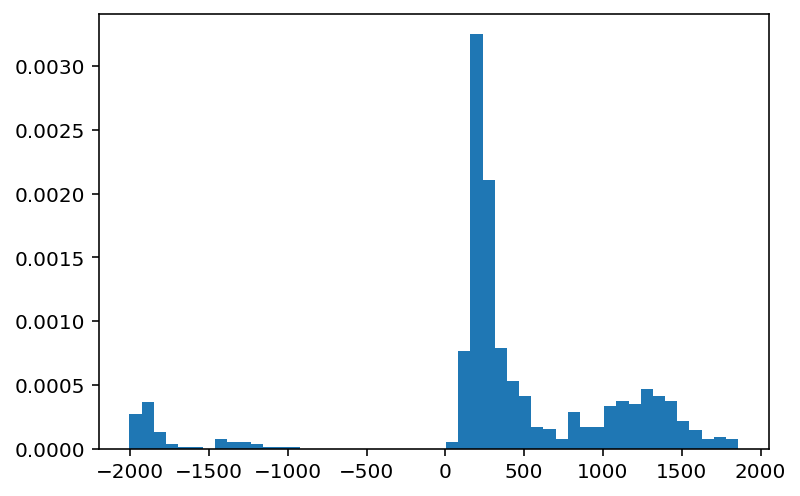

In [36]:
plt.hist(record[:1000], bins=50, density=True)

Record里面有很多负值，疑似异常值，**怎么处理？**

In [22]:
data.loc[data['Record'] < 0]

,Time,BuildingID,Type,Record
811,2015-01-17 21:00:00,0,W,-1906.40
813,2015-01-17 22:00:00,0,W,-1918.36
815,2015-01-17 23:00:00,0,W,-1915.40
817,2015-01-18 00:00:00,0,W,-1915.38
819,2015-01-18 01:00:00,0,W,-1917.35
...,...,...,...,...
624706,2017-08-16 17:00:00,11,Q,-14529.85
624840,2017-08-19 12:00:00,11,Q,-437837.01
625330,2017-08-29 17:00:00,11,Q,-17955.46
625793,2017-09-08 08:00:00,11,W,-1711.06


W记录错误？

In [25]:
data.iloc[809:815,:]

,Time,BuildingID,Type,Record
809,2015-01-17 20:00:00,0,W,236.13
810,2015-01-17 21:00:00,0,Q,284.32
811,2015-01-17 21:00:00,0,W,-1906.40
812,2015-01-17 22:00:00,0,Q,297.44
813,2015-01-17 22:00:00,0,W,-1918.36
814,2015-01-17 23:00:00,0,Q,282.32


看来正值也有异常值

In [26]:
data.iloc[624704:624710,:]

,Time,BuildingID,Type,Record
624704,2017-08-16 16:00:00,11,Q,2117.38
624705,2017-08-16 16:00:00,11,W,2.64
624706,2017-08-16 17:00:00,11,Q,-14529.85
624707,2017-08-16 17:00:00,11,W,1.32
624708,2017-08-16 18:00:00,11,Q,18221.54
624709,2017-08-16 18:00:00,11,W,0.00


## 整合天气数据

读入2015天气数据

In [11]:
weather_data_2015 = pd.read_excel('./4 weather/shanghai weather_2015.xlsx', sheet_name=0, index_col=None)

In [12]:
weather_data_2015.head()

,Time,temp,dew point,relative humidity,air pressure,wind speed
0,2015-01-01 00:00:00,1.5,-12.0,36.5,1033.0,16.2
1,2015-01-01 01:00:00,1.0,-10.5,42.5,1033.0,14.4
2,2015-01-01 02:00:00,1.0,-11.0,41.0,1033.0,18.0
3,2015-01-01 03:00:00,0.5,-11.0,42.5,1033.0,14.4
4,2015-01-01 04:00:00,0.0,-10.5,46.0,1033.0,18.0


In [13]:
weather_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               8760 non-null   datetime64[ns]
 1   temp               8760 non-null   float64       
 2   dew point          8760 non-null   float64       
 3   relative humidity  8760 non-null   float64       
 4   air pressure       8760 non-null   float64       
 5   wind speed         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 410.8 KB


In [18]:
weather_data_2015.astype({'Time': 'string'}, copy=False)

,Time,temp,dew point,relative humidity,air pressure,wind speed
0,2015-01-01 00:00:00,1.5,-12.0,36.5,1033.0,16.2
1,2015-01-01 01:00:00,1.0,-10.5,42.5,1033.0,14.4
2,2015-01-01 02:00:00,1.0,-11.0,41.0,1033.0,18.0
3,2015-01-01 03:00:00,0.5,-11.0,42.5,1033.0,14.4
4,2015-01-01 04:00:00,0.0,-10.5,46.0,1033.0,18.0
...,...,...,...,...,...,...
8755,2015-12-31 19:00:00,5.5,-1.0,63.0,1035.0,10.8
8756,2015-12-31 20:00:00,6.0,1.0,70.0,1035.5,12.6
8757,2015-12-31 21:00:00,5.5,1.0,73.0,1036.0,10.8
8758,2015-12-31 22:00:00,5.0,0.0,70.0,1035.0,9.0


In [19]:
weather_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               8760 non-null   datetime64[ns]
 1   temp               8760 non-null   float64       
 2   dew point          8760 non-null   float64       
 3   relative humidity  8760 non-null   float64       
 4   air pressure       8760 non-null   float64       
 5   wind speed         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 410.8 KB


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047614 entries, 0 to 1047613
Data columns (total 4 columns):
Time          1047614 non-null object
BuildingID    1047614 non-null int64
Type          1047614 non-null object
Record        1047614 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [22]:
data['Time'] = pd.to_datetime(data['Time'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047614 entries, 0 to 1047613
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Time        1047614 non-null  datetime64[ns]
 1   BuildingID  1047614 non-null  int64         
 2   Type        1047614 non-null  object        
 3   Record      1047614 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


In [24]:
merge_2015 = pd.merge(data, weather_data_2015, how='left', on='Time')

In [26]:
merge_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047614 entries, 0 to 1047613
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Time               1047614 non-null  datetime64[ns]
 1   BuildingID         1047614 non-null  int64         
 2   Type               1047614 non-null  object        
 3   Record             1047614 non-null  float64       
 4   temp               350400 non-null   float64       
 5   dew point          350400 non-null   float64       
 6   relative humidity  350400 non-null   float64       
 7   air pressure       350400 non-null   float64       
 8   wind speed         350400 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 79.9+ MB


In [27]:
merge_2015.head()

,Time,BuildingID,Type,Record,temp,dew point,relative humidity,air pressure,wind speed
0,2015-01-01 00:00:00,0,Q,222.00,1.5,-12.0,36.5,1033.0,16.2
1,2015-01-01 00:00:00,0,W,203.15,1.5,-12.0,36.5,1033.0,16.2
2,2015-01-01 01:00:00,0,Q,236.00,1.0,-10.5,42.5,1033.0,14.4
3,2015-01-01 01:00:00,0,W,205.14,1.0,-10.5,42.5,1033.0,14.4
4,2015-01-01 02:00:00,0,Q,222.00,1.0,-11.0,41.0,1033.0,18.0


继续读入2016 2017天气数据

In [28]:
weather_2016 = pd.read_excel('./4 weather/shanghai weather_2016.xlsx', sheet_name=0, index_col=None)
weather_2017 = pd.read_excel('./4 weather/shanghai weather_2017.xlsx', sheet_name=0, index_col=None)

In [29]:
weather_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     8760 non-null   datetime64[ns]
 1   温度（℃）    8761 non-null   float64       
 2   露点温度（℃）  8761 non-null   float64       
 3   相对湿度（%）  8761 non-null   float64       
 4   气压（pa）   8761 non-null   float64       
 5   风速（m/s）  8761 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 410.8 KB


In [37]:
# 修改列名
weather_2016 = weather_2016.rename(columns={'time':'Time', '温度（℃）':'temp', '露点温度（℃）':'dew point', '相对湿度（%）':'relative humidity', '气压（pa）':'air pressure', '风速（m/s）':'wind speed'}, copy=False)
weather_2017 = weather_2017.rename(columns={'time':'Time', '温度（℃）':'temp', '露点温度（℃）':'dew point', '相对湿度（%）':'relative humidity', '气压（pa）':'air pressure', '风速（m/s）':'wind speed'}, copy=False)

In [36]:
weather_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               8760 non-null   datetime64[ns]
 1   temp               8761 non-null   float64       
 2   dew point          8761 non-null   float64       
 3   relative humidity  8761 non-null   float64       
 4   air pressure       8761 non-null   float64       
 5   wind speed         8761 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 410.8 KB


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047614 entries, 0 to 1047613
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Time        1047614 non-null  datetime64[ns]
 1   BuildingID  1047614 non-null  int64         
 2   Type        1047614 non-null  object        
 3   Record      1047614 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


In [62]:
# 把train.csv中的数据按年份单独取出，以便做merge
data_2015 = data[data['Time'].astype(str).str.contains('2015')]
data_2016 = data[data['Time'].astype(str).str.contains('2016')]
data_2017 = data[data['Time'].astype(str).str.contains('2017')]

In [63]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350400 entries, 0 to 1012525
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Time        350400 non-null  datetime64[ns]
 1   BuildingID  350400 non-null  int64         
 2   Type        350400 non-null  object        
 3   Record      350400 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 13.4+ MB


In [68]:
merge_2015 = pd.merge(data_2015, weather_data_2015, how='left', on='Time')
merge_2016 = pd.merge(data_2016, weather_2016, how='left', on='Time')
merge_2017 = pd.merge(data_2017, weather_2017, how='left', on='Time')

In [69]:
merge_2015_2016 = merge_2015.append(merge_2016, ignore_index=True)

In [74]:
merge_all = merge_2015_2016.append(merge_2017, ignore_index=True)

In [76]:
merge_all.to_excel('./merge.xlsx')